In [50]:
# from lfs_tree import *
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
import pydot
import networkx as nx
from string import Template
import pandas as pd
import glob
import pydot
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
import pickle
import os
from IPython.display import Image, display
import matplotlib as mpl

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Configure global font size settings
mpl.rcParams.update({
    'font.size': 25,  # Default font size for titles, labels, and tick labels
    'axes.labelsize': 25,  # Font size for axis labels
    'xtick.labelsize': 20,  # Font size for x-axis tick labels
    'ytick.labelsize': 18,  # Font size for y-axis tick labels
    'legend.fontsize': 20  # Font size for the legend
})


In [51]:
rules_dict = {}
for f in glob.glob('../../chatgpt_rbbm/chatgpt_rules/*_gpt_rules.pkl'):
    with open(f, 'rb') as file:
        rules_dict[f.split('/')[-1].split('_')[0]] = pickle.load(file)


In [52]:
def view_pydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

def show_trees(directory):
    print(directory)
    treefiles = glob.glob(f'{directory}*tree_*')
    print(len(treefiles))
#     print(treefiles)
    num_trees_per_strat = len(treefiles)/2
#     for i in range(0, int(num_trees_per_strat)):
    for f in glob.glob(f'{directory}*tree_*'):
        file = open(f)
        dot_string = file.read()
        print(f)
        graph = pydot.graph_from_dot_data(dot_string)[0]
        view_pydot(graph)
        print('\n')
        
def show_stats(directory):
    f = glob.glob(f'{directory}*experiment_stats')[0]
#     print(f)
#                                 experiment_stats
#     file = open('../intro_example/experiment_stats')
    df = pd.read_csv(f)
#     print(df)
    return df

def show_user_inputs(directory):
    f = glob.glob(f'{directory}sampled*')[0]
    df = pd.read_csv(f)
    print(list(df))
    return df.sort_values(by=['text'])

def view_repair_bookkeeping_results(directory):
    print(glob.glob(f'{directory}*book_keeping_dict*'))
    f = glob.glob(f'{directory}*book_keeping_dict*')[0]
#               20230921002723fix_book_keeping_dict.pkl
    with open(f, 'rb') as file:
        # Load the object from the file
        loaded_object = pickle.load(file)
#         print("Object loaded successfully:")
#         print(loaded_object)
    return loaded_object

In [53]:
# postproecssing 
# show fix rate, confirm preserve rate, global rate
# find some reasonable repairs

In [54]:
dir4 = '../../rbbm_src/gpt_experiment_results_folders_mv/'

In [55]:
import os
import re
import glob

# Path to the main directory
main_folder = dir4
# folders = [dir4]


def read_and_print_file_content(file_path):
    return pd.read_csv(file_path)

# Regular expression pattern for matching subfolder names (e.g., 'YYYY-MM-DD')
folder_pattern =  r'_20240201.*'

# File pattern to match within subfolders (e.g., all '.txt' files)
file_pattern = 'experiment_stats'

stats_dfs = []
# Iterate over all items in the main folder
for item in os.listdir(main_folder):
    # Full path of the item
    path = os.path.join(main_folder, item)
#     print(path)
    # Check if it's a folder and matches the pattern
    if os.path.isdir(path) and re.match(folder_pattern, item):
#         print(path)
        # Use glob to find files that match the file pattern in the subfolder
        for file in glob.glob(f'{path}/*experiment_stats'):
            df = read_and_print_file_content(file)
            stats_dfs.append(df)


In [56]:
stats_df = pd.concat(stats_dfs)

In [57]:
stats_df

,strat,seed,pickle_file_name,table_name,timestamp_str,deletion_type,deletion_absolute_threshold,rbbm_runtime,bbox_runtime,avg_tree_size_increase,user_input_size,complaint_ratio,num_complaints,num_confirmations,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,prev_signaled_cnt,new_signaled_cnt,num_functions,deletion_factor,post_fix_num_funcs,num_of_funcs_processed_by_algo,complaint_reached_max,confirm_reached_max,lf_source,retrain_after_percent,retrain_accuracy_thresh,load_funcs_from_pickle,pre_deletion_threshold
0,information_gain,276,placeholder_name,painter_architect,20240201163625,ratio,10,1.104,110.418,0.650000,40,0.5,20,20,0.928,1.0,1.0,0.768,11454,11454,120,0.0,120,120,False,False,undefined,1,1,False,0.0
0,information_gain,276,placeholder_name,professor_teacher,20240201163856,ratio,10,1.413,302.374,0.472727,40,0.5,20,20,0.769,1.0,1.0,0.697,22323,22323,110,0.0,110,110,False,False,undefined,1,1,False,0.0
0,information_gain,276,placeholder_name,youtube,20240201164518,ratio,10,0.309,6.833,0.707692,40,0.5,20,20,0.831,1.0,1.0,0.866,1441,1441,65,0.0,65,65,False,False,undefined,1,1,False,0.0
0,information_gain,276,placeholder_name,amazon,20240201164534,ratio,10,1.130,1372.456,0.488372,40,0.5,20,20,0.801,1.0,1.0,0.573,156138,156138,86,0.0,86,86,False,False,undefined,1,1,False,0.0
0,information_gain,276,placeholder_name,painter_architect,20240201171400,ratio,10,3.293,109.016,1.116667,80,0.5,40,40,0.928,1.0,1.0,0.805,11454,11454,120,0.0,120,120,False,False,undefined,1,1,False,0.0
0,information_gain,276,placeholder_name,professor_teacher,20240201171628,ratio,10,2.956,208.492,0.854545,80,0.5,40,40,0.769,1.0,1.0,0.628,22323,22323,110,0.0,110,110,False,False,undefined,1,1,False,0.0
0,information_gain,276,placeholder_name,youtube,20240201172100,ratio,10,0.942,6.959,1.107692,80,0.5,40,40,0.831,1.0,1.0,0.831,1441,1441,65,0.0,65,65,False,False,undefined,1,1,False,0.0
0,information_gain,276,placeholder_name,amazon,20240201172116,ratio,10,4.446,1362.958,0.883721,80,0.5,40,40,0.801,1.0,1.0,0.650,156138,156138,86,0.0,86,86,False,False,undefined,1,1,False,0.0
0,information_gain,673,placeholder_name,painter_architect,20240201174931,ratio,10,1.871,108.612,0.533333,40,0.5,20,20,0.928,1.0,1.0,0.700,11454,11332,120,0.0,120,120,False,False,undefined,1,1,False,0.0
0,information_gain,673,placeholder_name,professor_teacher,20240201175201,ratio,10,1.204,205.839,0.563636,40,0.5,20,20,0.769,1.0,1.0,0.733,22323,22323,110,0.0,110,110,False,False,undefined,1,1,False,0.0


In [58]:
stats_df.sort_values(by=['fix_rate','table_name','user_input_size'])[['fix_rate','table_name',
                                                                      'user_input_size','timestamp_str']]

,fix_rate,table_name,user_input_size,timestamp_str
0,1.0,amazon,40,20240201164534
0,1.0,amazon,40,20240201175643
0,1.0,amazon,40,20240201191516
0,1.0,amazon,80,20240201172116
0,1.0,amazon,80,20240201183921
0,1.0,amazon,80,20240201195534
0,1.0,painter_architect,40,20240201163625
0,1.0,painter_architect,40,20240201174931
0,1.0,painter_architect,40,20240201190804
0,1.0,painter_architect,40,20240201202908


In [59]:
stats_df.sort_values(by=['fix_rate','global_accuracy'])

,strat,seed,pickle_file_name,table_name,timestamp_str,deletion_type,deletion_absolute_threshold,rbbm_runtime,bbox_runtime,avg_tree_size_increase,user_input_size,complaint_ratio,num_complaints,num_confirmations,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,prev_signaled_cnt,new_signaled_cnt,num_functions,deletion_factor,post_fix_num_funcs,num_of_funcs_processed_by_algo,complaint_reached_max,confirm_reached_max,lf_source,retrain_after_percent,retrain_accuracy_thresh,load_funcs_from_pickle,pre_deletion_threshold
0,information_gain,276,placeholder_name,professor_teacher,20240201163856,ratio,10,1.413,302.374,0.472727,40,0.5,20,20,0.769,1.0,1.0,0.697,22323,22323,110,0.0,110,110,False,False,undefined,1,1,False,0.0
0,information_gain,276,placeholder_name,professor_teacher,20240201171628,ratio,10,2.956,208.492,0.854545,80,0.5,40,40,0.769,1.0,1.0,0.628,22323,22323,110,0.0,110,110,False,False,undefined,1,1,False,0.0
0,information_gain,673,placeholder_name,professor_teacher,20240201175201,ratio,10,1.204,205.839,0.563636,40,0.5,20,20,0.769,1.0,1.0,0.733,22323,22323,110,0.0,110,110,False,False,undefined,1,1,False,0.0
0,information_gain,673,placeholder_name,professor_teacher,20240201183420,ratio,10,3.328,208.928,1.036364,80,0.5,40,40,0.769,1.0,1.0,0.740,22323,22323,110,0.0,110,110,False,False,undefined,1,1,False,0.0
0,information_gain,1407,placeholder_name,professor_teacher,20240201191031,ratio,10,0.895,206.840,0.490909,40,0.5,20,20,0.769,1.0,1.0,0.595,22323,22323,110,0.0,110,110,False,False,undefined,1,1,False,0.0
0,information_gain,1407,placeholder_name,professor_teacher,20240201195024,ratio,10,2.328,230.555,0.854545,80,0.5,40,40,0.769,1.0,1.0,0.596,22323,22323,110,0.0,110,110,False,False,undefined,1,1,False,0.0
0,information_gain,278,placeholder_name,professor_teacher,20240201203214,ratio,10,0.957,265.297,0.563636,40,0.5,20,20,0.769,1.0,1.0,0.540,22323,22323,110,0.0,110,110,False,False,undefined,1,1,False,0.0
0,information_gain,276,placeholder_name,amazon,20240201164534,ratio,10,1.130,1372.456,0.488372,40,0.5,20,20,0.801,1.0,1.0,0.573,156138,156138,86,0.0,86,86,False,False,undefined,1,1,False,0.0
0,information_gain,276,placeholder_name,amazon,20240201172116,ratio,10,4.446,1362.958,0.883721,80,0.5,40,40,0.801,1.0,1.0,0.650,156138,156138,86,0.0,86,86,False,False,undefined,1,1,False,0.0
0,information_gain,673,placeholder_name,amazon,20240201175643,ratio,10,2.008,1699.061,0.627907,40,0.5,20,20,0.801,1.0,1.0,0.565,156138,156138,86,0.0,86,86,False,False,undefined,1,1,False,0.0


In [60]:
stats_df= stats_df.sort_values(by=['fix_rate'])[['user_input_size','table_name','rbbm_runtime','bbox_runtime',
                                      'avg_tree_size_increase', 
                                      'global_accuracy', 'fix_rate', 'confirm_preserve_rate',
                                       'new_global_accuracy','seed']]
stats_df = stats_df.groupby(['user_input_size', 'table_name']).mean().reset_index()
rename_dict = {'professor_teacher':'PT', 'painter_architect':'PA', 'youtube':'YTSpam','amazon':'amazon'}
stats_df['table_name'] = stats_df['table_name'].replace(rename_dict)


In [64]:

df1=stats_df[stats_df['user_input_size']==40].sort_values('table_name')
df2=stats_df[stats_df['user_input_size']==80].sort_values('table_name')

# df1=df[df['user_input_size']==40].sort_values('table_name')
# df2=df[df['user_input_size']==80].sort_values('table_name')

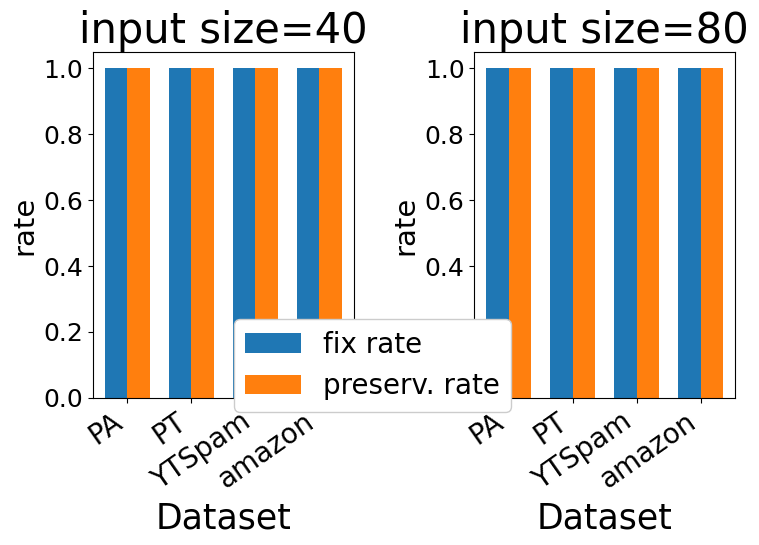

In [65]:

# Extract values and labels

table_names1 = df1['table_name']
fix_rate_values1 = df1['fix_rate']
confirm_preserve_rate_values1 = df1['confirm_preserve_rate']
x1 = np.arange(len(table_names1))

table_names2 = df2['table_name']
fix_rate_values2 = df2['fix_rate']
confirm_preserve_rate_values2 = df1['confirm_preserve_rate']
x2 = np.arange(len(table_names2))
bar_width = 0.35

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(8, 6))

# Plot the first graph on the first subplot
axes[0].bar(x1 - bar_width/2, fix_rate_values1, bar_width, label='fix rate')
axes[0].bar(x1 + bar_width/2, confirm_preserve_rate_values1, bar_width, label='preserv. rate')

# Plot the second graph on the second subplot
axes[1].bar(x2 - bar_width/2, fix_rate_values2, bar_width)
axes[1].bar(x2 + bar_width/2, confirm_preserve_rate_values2, bar_width)

# Customize the plots
# for ax in axes:
axes[0].set_xlabel('dataset')
axes[0].set_ylabel('rate',fontsize=21)
axes[0].set_title('input size=40')

# axes[0].set_title('Fix Rate and Confirm Preserve Rate per Dataset')
axes[0].set_xticks(x1)
axes[0].set_xticklabels(table_names1)
# axes[0].legend(loc='lower center')
axes[1].set_xlabel('dataset')
axes[1].set_ylabel('rate', fontsize=21)
axes[1].set_title('input size=80')

# axes[1].set_title('Fix Rate and Confirm Preserve Rate per Dataset')
axes[1].set_xticks(x2)
axes[1].set_xticklabels(table_names2)
# fig.suptitle('fix rate + confirm preserve rate', y=0.95)
# Customize the plots
legend = fig.legend(loc='center', bbox_to_anchor=(0.5, 0.345))
legend.get_frame().set_facecolor('white')  # Set the background color to white
legend.get_frame().set_alpha(1.0)  # Set the framealpha to 1.0 (fully opaque)
for ax in axes:
    ax.set_xlabel('Dataset')
#     ax.set_ylabel('Rate')
    ax.set_xticks(ax.get_xticks())  # Make sure the ticks are set
    ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha='right')  # Rotate x-axis labels for 45 degrees
#     ax.legend()
    



# Add legends for both bars
# axes[0].legend(loc='upper left',bbox_to_anchor=(-0.15, 1.2))
# axes[1].legend(loc='upper right',bbox_to_anchor=(1.15, 1.2))


# Show the plot
plt.tight_layout()
plt.savefig(f"graph_pdfs/gpt_case_study_fixconfirm_mv.pdf", format="pdf")
plt.show()


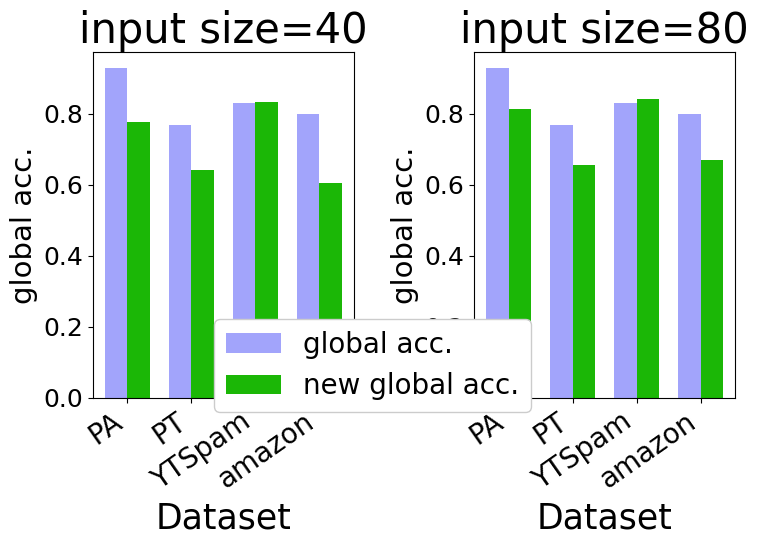

In [66]:
import matplotlib.pyplot as plt
import pandas as pd


# Extract values and labels
table_names1 = df1['table_name']
global_accuracy1 = df1['global_accuracy']
new_global_accuracy1 = df1['new_global_accuracy']
x1 = np.arange(len(table_names1))

table_names2 = df2['table_name']
global_accuracy2 = df2['global_accuracy']
new_global_accuracy2 = df2['new_global_accuracy']
x2 = np.arange(len(table_names2))
bar_width = 0.35

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(8, 6))

# Plot the first graph on the first subplot
axes[0].bar(x1 - bar_width/2, global_accuracy1, bar_width, label='global acc.', color='#a2a4fb')
axes[0].bar(x1 + bar_width/2, new_global_accuracy1, bar_width, label='new global acc.', color='#1bb706')

# Plot the second graph on the second subplot
axes[1].bar(x2 - bar_width/2, global_accuracy2, bar_width, color='#a2a4fb')
axes[1].bar(x2 + bar_width/2, new_global_accuracy2, bar_width, color='#1bb706')

# Customize the plots
# for ax in axes:
axes[0].set_xlabel('dataset')
axes[0].set_ylabel('global acc.',fontsize=21)
axes[0].set_title('input size=40')
axes[0].set_xticks(x1)
axes[0].set_xticklabels(table_names1)
# axes[0].legend(loc='lower center')
axes[1].set_xlabel('dataset')
axes[1].set_ylabel('global acc.', fontsize=21)
axes[1].set_title('input size=80')
axes[1].set_xticks(x2)
axes[1].set_xticklabels(table_names2)
# axes[1].legend(loc='lower center')
# fig.suptitle('global accuracy',y=0.95)

legend = fig.legend(loc='center', bbox_to_anchor=(0.5, 0.345))
legend.get_frame().set_facecolor('white')  # Set the background color to white
legend.get_frame().set_alpha(1.0)  # Set the framealpha to 1.0 (fully opaque)

for ax in axes:
    ax.set_xlabel('Dataset')
#     ax.set_ylabel('Rate')
    ax.set_xticks(ax.get_xticks())  # Make sure the ticks are set
    ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha='right')  # Rotate x-axis labels for 45 degrees
#     ax.legend()
    

# Show the plot
plt.tight_layout()
plt.savefig(f"graph_pdfs/gpt_case_study_global_mv.pdf", format="pdf")

plt.show()
